In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot,residuals_plot
#https://anaconda.org/DistrictDataLabs/yellowbrick
from yellowbrick.datasets import load_concrete
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels

In [6]:
website=pd.read_csv('EcommerceCustomers.csv')

In [14]:
website= website.iloc[:,3:]

In [24]:
website.columns=['Session_Length',"Time_On_App","Time_On_Website","Length_Of_Membership","Amount_Spent"]

In [25]:
website.describe().astype(int)

,Session_Length,Time_On_App,Time_On_Website,Length_Of_Membership,Amount_Spent
count,500,500,500,500,500
mean,33,12,37,3,499
std,0,0,1,0,79
min,29,8,33,0,256
25%,32,11,36,2,445
50%,33,11,37,3,498
75%,33,12,37,4,549
max,36,15,40,6,765


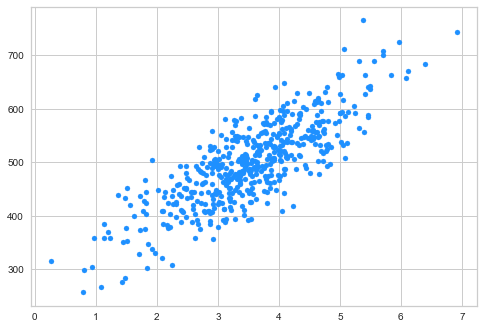

In [95]:
plt.scatter(website.Length_Of_Membership,website.Amount_Spent ,s=25,color='dodgerblue')

<h2><b>Assumptions - 1 : No multicollinearity between independent variables</b><br></h2>
How to test the multicollinearity between independent variables
<br><br>
correlation methods<br>
VIF

In [27]:
website.corr()['Amount_Spent'].sort_values(ascending=False)

Amount_Spent            1.000000
Length_Of_Membership    0.809084
Time_On_App             0.499328
Session_Length          0.355088
Time_On_Website        -0.002641
Name: Amount_Spent, dtype: float64

<b>Problems if we have multicollinearity</b><br>
<br>
A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. That last portion is crucial for our further discussion about multicollinearity. The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.<br>
Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.<br>

<br><b>
Solution if we have multicollinearity</b><br>
<br>
Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce those independent variables which are less co-related.<br>
Very good answers about multicollinearity<br>
<br>
https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

In [44]:
data=pd.DataFrame(scaler.fit_transform(website))

In [55]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [56]:
X.shape,y.shape

((500, 4), (500,))

In [57]:
lr= LinearRegression(normalize=True)
lr.fit(X,y)

LinearRegression(normalize=True)

<AxesSubplot:>

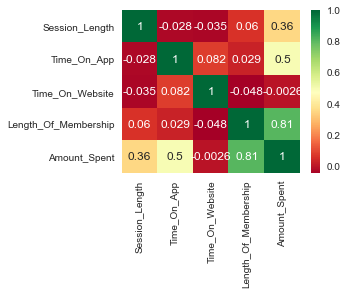

In [58]:
plt.figure(figsize=(4,3))
sns.heatmap(website.corr(),cmap = "RdYlGn",annot=True)

<h3> See what the datset looks like

<AxesSubplot:>

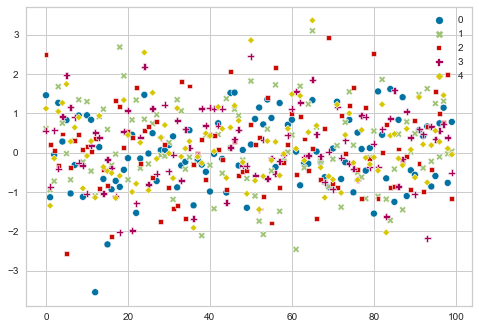

In [65]:
sns.scatterplot(data=data[:100])

In [72]:
X=website.iloc[:,0:-1]
y=website.iloc[:,-1]

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [74]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [75]:
y_pred = lr.predict(X_train)

In [79]:
y_train.mean(), y_test.mean()

(501.8973544683114, 494.0691235297635)

In [78]:
mean_squared_error(y_train,y_pred)

96.9324546896065

In [76]:
mean_squared_error(y_test,lr.predict(X_test))

102.40428659931929

<h2>Assumptions - 2 : A Linear relationship between dependent & independent variables.</h2><br>
How to test the Linearity between Independent and dependent variables
<br>
nonlinearity is usually most evident in a plot of actual versus predicted values or a plot of residuals versus predicted values
<br><br>
The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed.
<br><br>
The effects of different independent variables on the expected value of the dependent variable are additive.
Use regression plot to check the linearity between Independent and dependent variables<br><br>

In [80]:
cols = list(X_train.columns)
cols

['Session_Length', 'Time_On_App', 'Time_On_Website', 'Length_Of_Membership']

[]

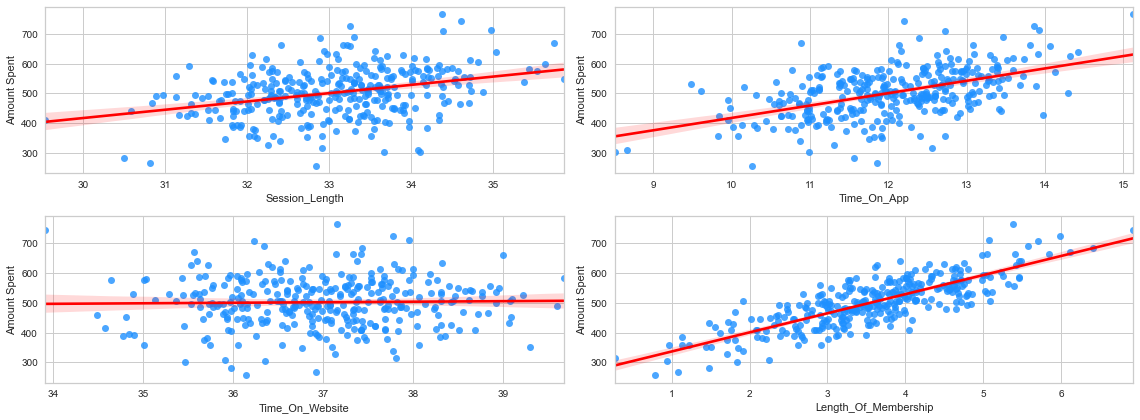

In [96]:
fig, axs = plt.subplots(2,2,figsize=(16,6))
[sns.regplot(y = pd.DataFrame({"Amount Spent":y_train}),x=i, data=X_train,scatter_kws={"color": "dodgerblue"}, 
             line_kws={"color": "red"},ax=axs.flatten()[j]) for j,i in enumerate(cols)]
fig.tight_layout()
plt.plot()

<b>We can see that all the independent variables have the linear relationship with dependent variable</b><br>
<br>
<b>Problem if we apply LR in non-linear data</b><br>
Regression line will not capture much information due to distribution of data points and LR will not be able to provide the correct prediction.
<br>

<b>
Solution if we have non-linear relationship</b><br>
If the relationship is non-Linear we can use Non-Linear model works.

<h2>Assumptions - 3 : Residuals(errors) should be homoscedastic.</h2><br>
How to test homoscedasticity
<br><br>
1- residual vs fitted values(predicted values) plot.<br><br>
2 - plot the residuals versus independent variables to look for consistency there as well
<br><br>
3 - Use statistical Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.
<br><br>
1. plot the residuals versus predicted values

<h2> All residual plot

In [83]:
residuals = y_train - y_pred

[]

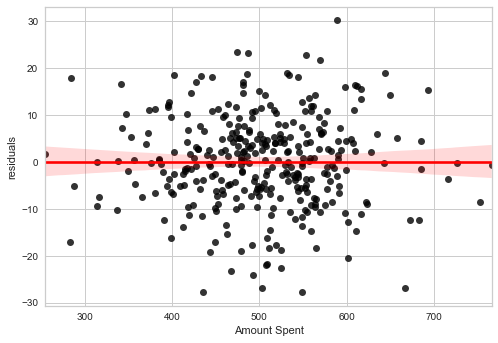

In [198]:
sns.regplot(y = residuals,x=(y_pred),scatter_kws={"color": "black"},line_kws={"color": "red"})
plt.ylabel("residuals")
plt.xlabel("Amount Spent")
plt.plot()

In [106]:
website.head(1)

,Session_Length,Time_On_App,Time_On_Website,Length_Of_Membership,Amount_Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054


<h2> Individual Residual Plot

In [187]:
website_columns

Index(['Session_Length', 'Time_On_App', 'Time_On_Website',
       'Length_Of_Membership', 'Amount_Spent'],
      dtype='object')

Session_Length
MSE for this feature is 5486.642453152553


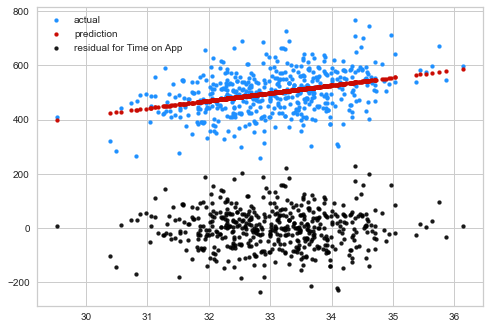

Time_On_App
MSE for this feature is 3857.4724319577867


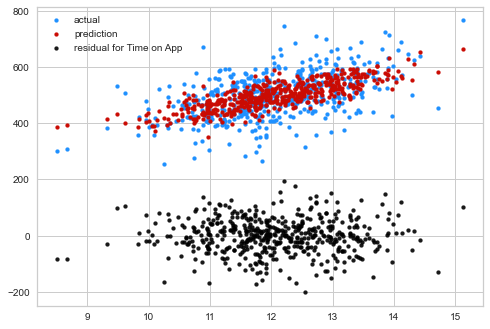

Time_On_Website
MSE for this feature is 3851.1108652205894


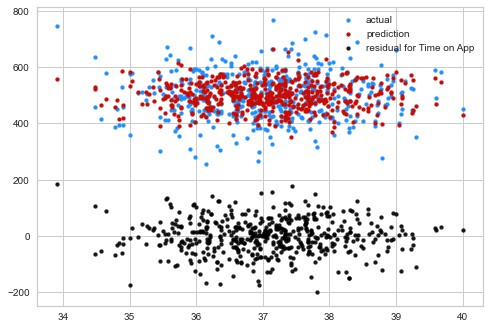

Length_Of_Membership
MSE for this feature is 98.47102522149011


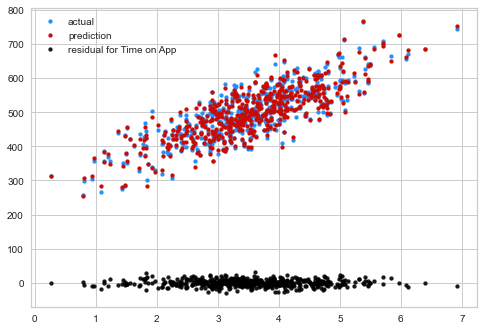

In [197]:
website_columns=website.columns
#fig, axs = plt.subplots(2,2,figsize=(16,6))
for i in range(1,5):
    lr=lr.fit(website.iloc[:,:i],y)
    redidual = y - (lr.predict(website.iloc[:,:i]))
    #fig, axs = plt.subplots(2,2,figsize=(16,6))
    col= website_columns[i-1]
    print(col)
    print("MSE for this feature is",mean_squared_error(y , lr.predict(website.iloc[:,:i])))
    plt.scatter(x=website[col], y=y, s=15 , label="actual",color="dodgerblue")
    plt.scatter(x=website[col], y= lr.predict(website.iloc[:,:i]) ,s=15,color='r' ,label="prediction")
    plt.scatter(x=website[col], y=redidual, s=15,color='black' , alpha=.9 ,label="residual for Time on App")

    plt.legend()
    plt.show()
    
    
    

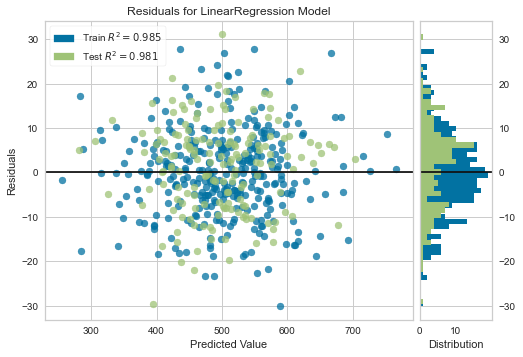

In [86]:
#res = residuals_plot(RandomForestRegressor(), X_train_b, y_train_b, X_test_b, y_test_b)
# from yellowbrick.regressor import ResidualsPlot,residuals_plot
res = residuals_plot(LinearRegression(), X_train, y_train, X_test, y_test)

[]

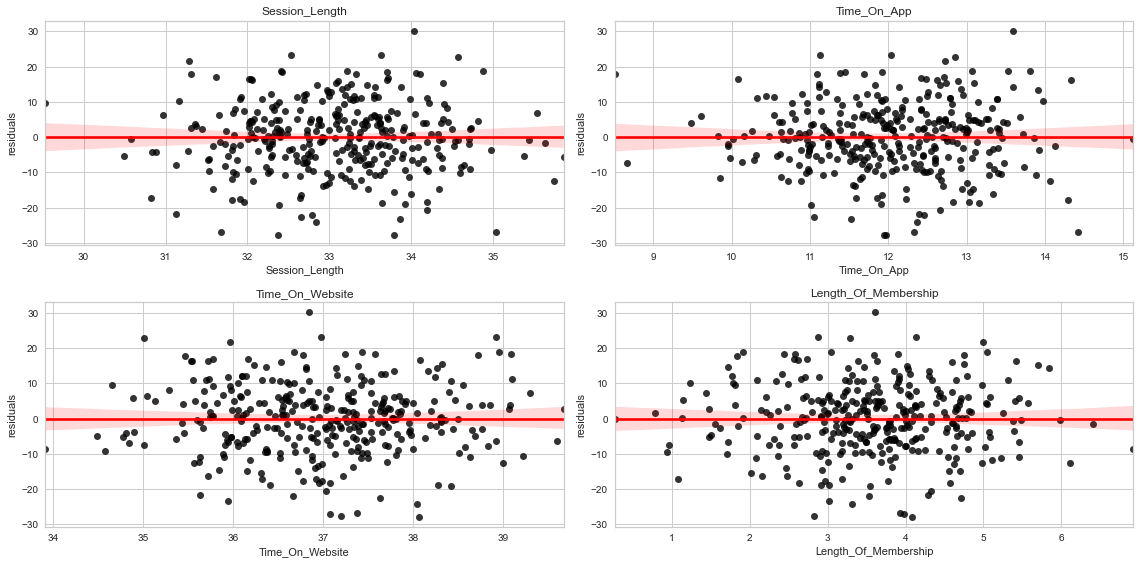

In [199]:
# Use regression plot residuals versus independent variables to look for consistency
fig, axs = plt.subplots(2,2,figsize=(16,8))
[sns.regplot(y = pd.DataFrame({"residuals":residuals}),x=i, data=X_train,scatter_kws={"color": "black"}, 
             line_kws={"color": "red"},ax=axs.flatten()[j]) for j,i in enumerate(cols[0:])]
[axs.flatten()[j].set_title(i) for j,i in enumerate(cols[0:])]
fig.tight_layout()
plt.plot()

<h2> Assumptions - 4 : Residuals should be normally distributed.</h2><br>
Technically, the normal distribution assumption is not necessary if you are willing to assume the model equation is correct and your only goal is to estimate its coefficients and generate predictions in such a way as to minimize mean squared error.<br>
Sometimes the error distribution is "skewed" by the presence of a few large outliers.
How to test normality test of residuals<br>
<br>
<br>
- KDE plot of residuals<br>
- Histogram of residuals<br>
- QQ plot<br>
- statistical tests of normality such as Kolmogorov-Smirnov test, Jarque–Bera test, or the Shapiro-Wilk test
1. KDE plot of the residuals



<h2> KDE plot should be normal

<AxesSubplot:xlabel='Amount_Spent', ylabel='Density'>

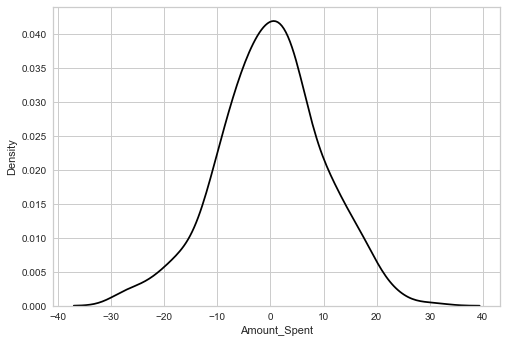

In [208]:
sns.kdeplot(residuals,color="black",alpha=1)

<h2> Residual mean should be 0

In [100]:
round(np.mean(residuals),4)

-0.0

<AxesSubplot:xlabel='Amount_Spent', ylabel='Count'>

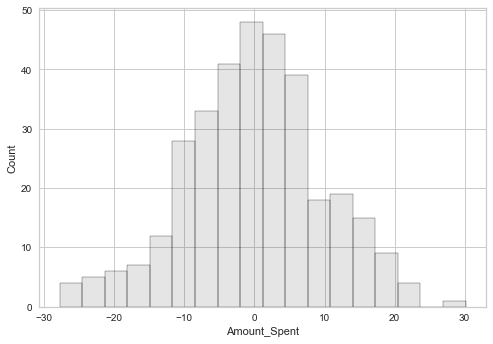

In [207]:
sns.histplot(residuals ,color="black",alpha=0.1)

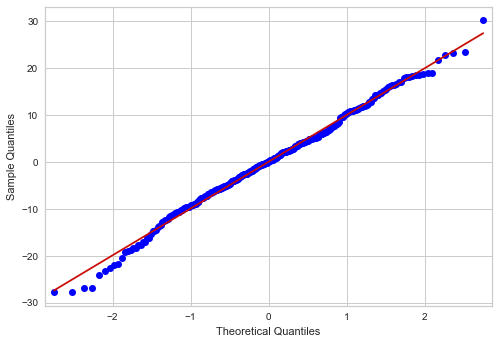

In [202]:
sm.qqplot(residuals, line ='r')
plt.show()

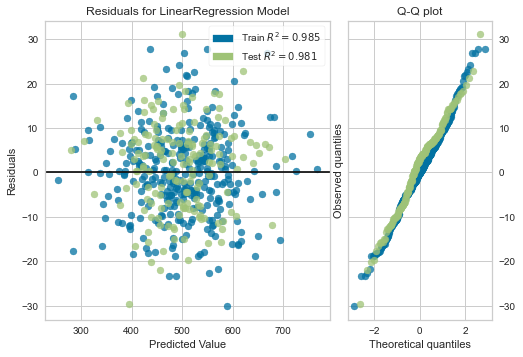

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [104]:
visualizer = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

<h2> Try another dataset that has no Linear relationship

In [209]:
card = pd.read_csv('card.csv')

In [213]:
card =card.dropna()

In [243]:
y=card['PURCHASES']

x=card[['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',\
        'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',\
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',\
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',\
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

In [218]:
x.shape[1]

16

In [253]:
y.shape

(8636,)

In [252]:
x.iloc[:,:i].shape

(8636, 1)

BALANCE
MSE for this feature is 4550218.320718512


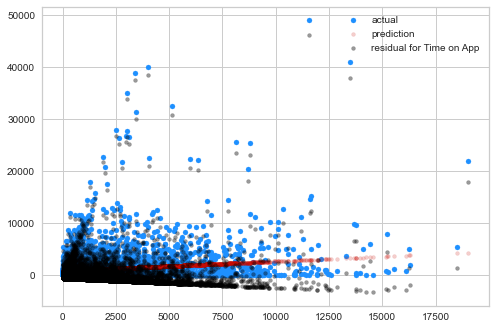

BALANCE_FREQUENCY
MSE for this feature is 4526176.911857221


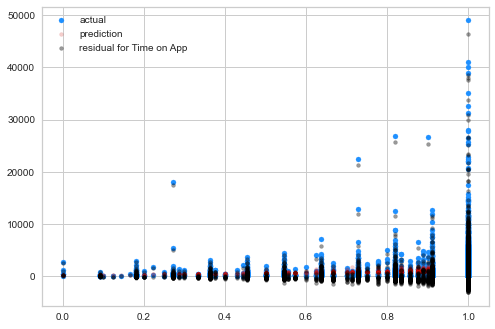

ONEOFF_PURCHASES
MSE for this feature is 741247.7233452335


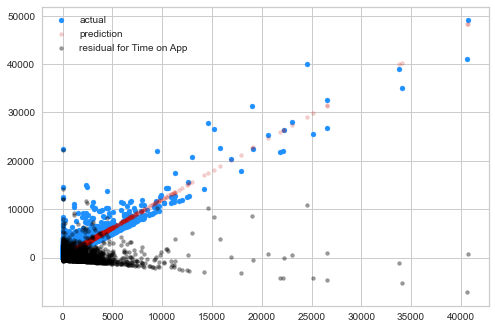

INSTALLMENTS_PURCHASES
MSE for this feature is 98.28294331403129


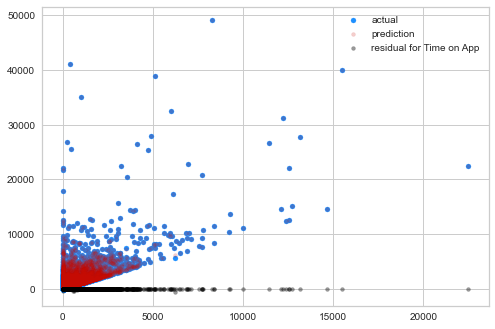

CASH_ADVANCE
MSE for this feature is 98.28243556613202


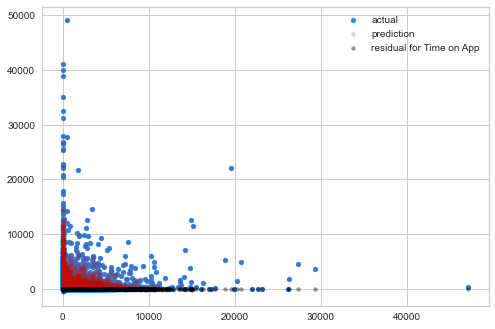

PURCHASES_FREQUENCY
MSE for this feature is 98.27905462672285


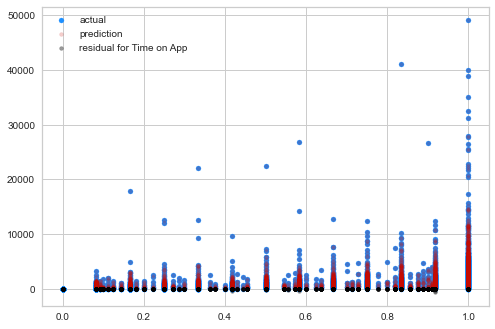

ONEOFF_PURCHASES_FREQUENCY
MSE for this feature is 98.2642259285207


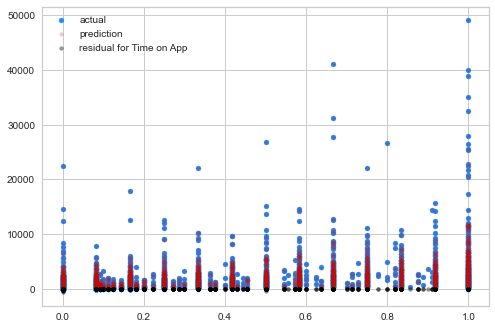

PURCHASES_INSTALLMENTS_FREQUENCY
MSE for this feature is 98.25026129910391


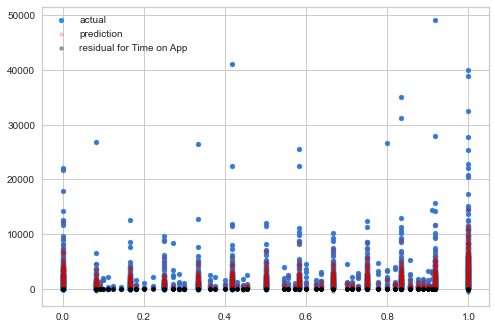

CASH_ADVANCE_FREQUENCY
MSE for this feature is 98.24982047212384


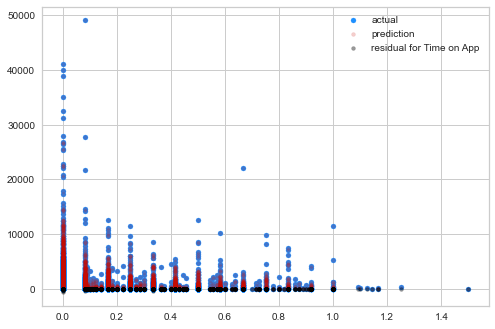

CASH_ADVANCE_TRX
MSE for this feature is 98.24950447390815


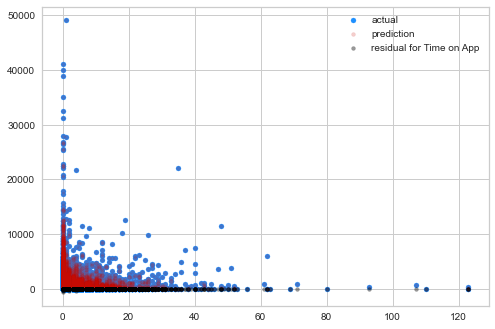

PURCHASES_TRX
MSE for this feature is 98.23509817921432


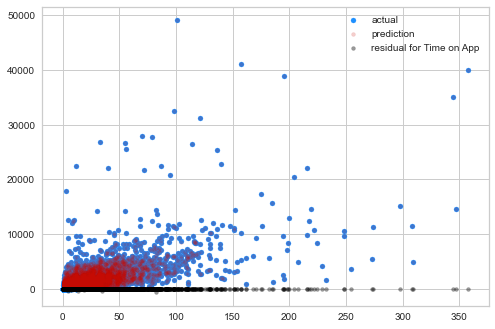

CREDIT_LIMIT
MSE for this feature is 98.23479974151114


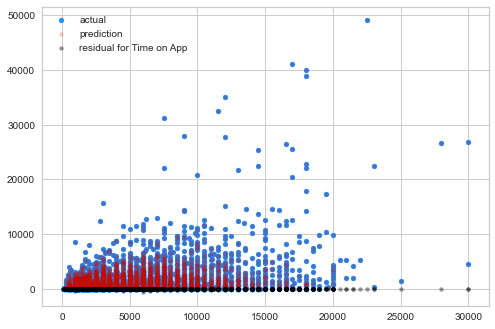

PAYMENTS
MSE for this feature is 98.23479878427


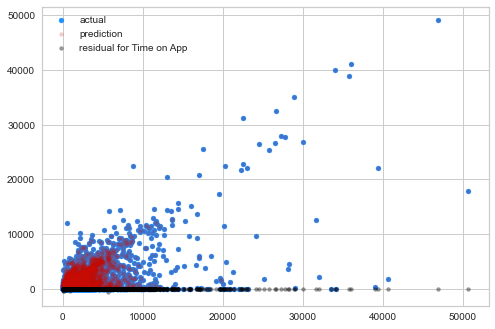

MINIMUM_PAYMENTS
MSE for this feature is 98.22931107897294


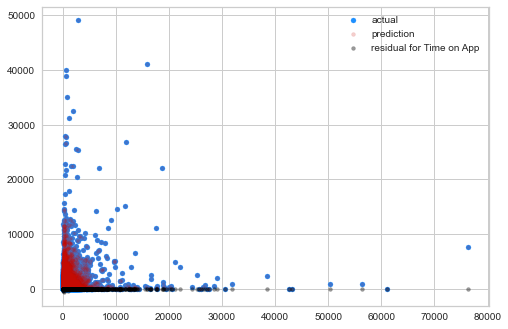

PRC_FULL_PAYMENT
MSE for this feature is 98.22657514777278


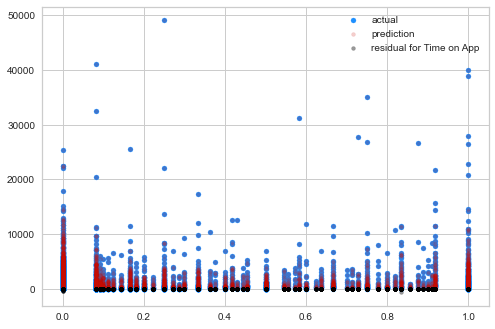

TENURE
MSE for this feature is 98.22639122477803


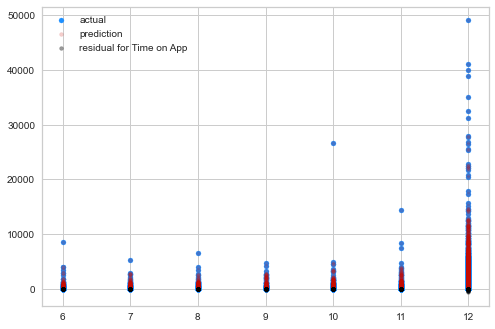

In [256]:
website_columns=['BALANCE', 'BALANCE_FREQUENCY', \
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',\
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',\
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',\
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',\
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

#fig, axs = plt.subplots(2,2,figsize=(16,6))
for i in range(1,x.shape[1]+1):
    lr=lr.fit(x.iloc[:,:i],y)
    redidual = y - (lr.predict(x.iloc[:,:i]))
    #fig, axs = plt.subplots(2,2,figsize=(16,6))
    col= website_columns[i-1]
    print(col)
    print("MSE for this feature is",mean_squared_error(y , lr.predict(x.iloc[:,:i])))
    plt.scatter(x=card[col], y=y, s=25 , label="actual",color="dodgerblue")
    plt.scatter(x=card[col], y= lr.predict(x.iloc[:,:i]) ,s=15, color='r' ,label="prediction" ,alpha=.2)
    plt.scatter(x=card[col], y=redidual, s=15,color='black' , alpha=.4 ,label="residual for Time on App")

    plt.legend()
    plt.show()

<h2> All Residuals

In [258]:
lr_all =lr.fit(x,y)

In [259]:
predict_all= lr_all.predict(x)

In [260]:
residual_all=y-predict_all

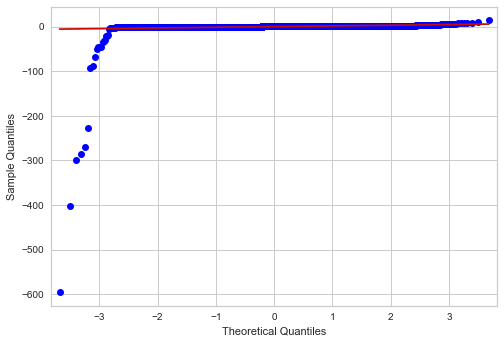

In [261]:
sm.qqplot(residual_all, line ='r')
plt.show()

<h2> Stastistic Tests to check for Residuals

<h4> Breusch-Pagan Statistical Test</h4><br>
It tests whether the variance of the errors from a regression is dependent on the values of the independent variables.

In [262]:
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#import statsmodels.stats.api as sms
# first artificially add intercept to X
X_b_s = sm.add_constant(x)
#slr_b = sm.OLS(np.log(y_bike),X_b_s)
slr_b = sm.OLS(y,X_b_s)
slr_model_b = slr_b.fit()
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(slr_model_b.resid,slr_model_b.model.exog, robust=True)
lzip(name, test)

[('Lagrange multiplier statistic', 45.61672023191018),
 ('p-value', 0.00011157307231641613),
 ('f-value', 2.8605425601673917),
 ('f p-value', 0.00010891515405594951)]

In [263]:
test

(45.61672023191018,
 0.00011157307231641613,
 2.8605425601673917,
 0.00010891515405594951)

In [266]:
(slr_model_b.model.exog).shape

(8636, 17)

In [265]:
p_value = round(test[1],5)
p_value

0.00011

<b>A Breusch-Pagan test uses the following null and alternative hypotheses:</b>
    <br>

The null hypothesis (H0): Homoscedasticity is present.<br>
The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)<br>

<br>
If p-value < level of significance (0.05); then null hypothesis is rejected.
If p-value > level of significance (0.05); then we fail to reject the null hypothesis.
<br>
In this example, the Lagrange multiplier statistic for the test is 45 and the corresponding p-value is 0.0. 
<br><br>
Because this p-value is less than 0.05, we fail to accept the null hypothesis. We do not have sufficient evidence to say that Homoscedasticity is present in the regression model.
<br>
<b>Problem if we have heteroscedasticity</b><br>
Bigger residuals imply greater error in Solution.
<br>
<b>Solution if we have heteroscedasticity</b>
<br>
To overcome heteroscedasticity, a possible way is to transform the response variable such as<h2> log(Y) or √Y. </h2> <br>Also, we can use weighted least square method to tackle heteroscedasticity.